# Analyse exploratoire des courriels

### importation des modules custom

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..')) +'\\analyser_tools'
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)
    
from EmailDataFrame import *

C:\Users\tousi\Google Drive\radio_canada\projet\decrypteur\repo_pyMboxAnalyser\analyser_tools


### import python modules

In [43]:
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import logging
import seaborn as sns
%matplotlib inline

### definir les paths vers les données

In [3]:
cwd = pathlib.PurePath(os.getcwd())
project_root_dir = cwd.parent
theme_path = project_root_dir / "data" / "theme_words.csv"
email_raw_path = project_root_dir / "output" / 'csv_file' / 'email_raw.csv'
facebook_url_info_path = project_root_dir / 'output' / 'csv_file' / 'facebook_urls_info.csv'
youtube_url_info_path = project_root_dir / 'output' / 'csv_file' / 'youtube_urls_info.csv'
log_file_path = project_root_dir / 'output' / 'log_file' / 'url_cleaning.log'
removed_email_path = project_root_dir / 'output' / 'csv_file' / 'removed_email_from_decrypteur.csv'

dataclean_pickle_path = project_root_dir / 'output' / 'pickle_obj' / 'dataClean'
dataclean_all_pickle_path = project_root_dir / 'output' / 'pickle_obj' / 'dataClean_all'
dataclean_pre_pickle_path = project_root_dir / 'output' / 'pickle_obj' / 'dataClean_pre'

corpus_em_path = project_root_dir / 'output' / 'pickle_obj' / 'corpus_em'
corpus_day_path = project_root_dir / 'output' / 'pickle_obj' / 'corpus_day'
dtm_em_path = project_root_dir / 'output' / 'pickle_obj' / 'dtm_em'
dtm_day_path = project_root_dir / 'output' / 'pickle_obj' / 'dtm_day'


In [4]:
fb_yt_converter = {'theme': lambda x: x.strip("[]").replace("'", "").strip().split(', ')}
email_raw_converters = {"attach_type": lambda x: x.strip("[]").replace("'", "").lower().strip().split(", "),
                        "urls": lambda x: x.strip("[]").replace("'", "").strip().split(', ')
                        }

### nettoyage et sauvegarde

In [5]:
# email_df_raw = EmailDF.from_csv(csv_path=email_raw_path, converters=email_raw_converters)
# email_df_raw.read_dict_theme_from_csv(theme_path)

# debut = (2020, 3, 1) # 1er mars 2020 pour le premier courriel
# fin = (9999, 12, 30) # infini

# pre_df = email_df = (email_df_raw.filt_by_date(start_date=(1000,1,1), end_date=(2020,3,1)) #conserver entre debut et fin
#             .remove_email_by_from() #log les courriels retirer 
#             .clean_urls() #courriel spam (antivirus), repetition de domaine
#             .add_domain_column() #trouver domaine des urls restants
#             .add_has_url_column() #ajouter s'il y a des urls ou non
#             .add_text_column() # combiner body et titre du courriel, puis retirer emoji, non-roman text, saut de ligne et tab
#             .add_theme_column() # tagger les courriels à partir du text
#             .add_source_column()) # trouver les sources (comme domaine, mais sans répétition)
# pre_df.to_pickle(dataclean_pre_pickle_path)


# all_df = (email_df_raw.remove_email_by_from()
#           .clean_urls()
#           .add_domain_column()
#           .add_has_url_column() #ajouter s'il y a des urls ou non
#           .add_text_column() # combiner body et titre du courriel, puis retirer emoji, non-roman text, saut de ligne et tab
#           .add_theme_column() # tagger les courriels à partir du text
#           .add_source_column())
# all_df.to_pickle(dataclean_all_pickle_path)

# email_df = (email_df_raw.filt_by_date(start_date=debut, end_date=fin) #conserver entre debut et fin
#             .remove_email_by_from(logpath=removed_email_path) #log les courriels retirer 
#             .clean_urls() #courriel spam (antivirus), repetition de domaine
#             .add_domain_column() #trouver domaine des urls restants
#             .add_has_url_column() #ajouter s'il y a des urls ou non
#             .add_text_column() # combiner body et titre du courriel, puis retirer emoji, non-roman text, saut de ligne et tab
#             .add_theme_column() # tagger les courriels à partir du text
#             .add_source_column()) # trouver les sources (comme domaine, mais sans répétition)

# email_df.to_pickle(dataclean_pickle_path)

# #URL UPDATE THEME COLLECTED FROM SCRAPPER: À faire si les themes ont changé depuis le scrapping
# fb_url = (UrlDF.from_csv(csv_path=facebook_url_info_path, parse_dates=None, converters=fb_yt_converter)
#          .update_theme('title'))
# fb_url.to_csv(facebook_url_info_path)
# yt_url = (UrlDF.from_csv(csv_path=youtube_url_info_path, parse_dates=None, converters=fb_yt_converter)
#           .update_theme('title')
#           .update_theme('description'))
# yt_url.to_csv(youtube_url_info_path)


# #Update Tag with URL INFO
# email_df = email_df.update_theme_using_urls_tag(fb_url, "facebook").update_theme_using_urls_tag(yt_url, 'youtube')
# email_df.to_pickle(dataclean_pickle_path)

# email_df = EmailDF.from_pickle(dataclean_pickle_path)

# #Utile pour compter l'occurence de mot par jour
# #Create CORPUS by email and day, Create DTM by email and day
# corpus_em = EmailCorpus.from_emailDF(email_df, by='email_id')
# corpus_em.to_pickle(corpus_em_path)

# corpus_day = EmailCorpus.from_emailDF(email_df, by='datetime', sampling = 'D')
# corpus_day.to_pickle(corpus_day_path)

# dtm_em = EmailDTM.from_corpus(corpus_em).update_dtm_with_dict_theme()
# dtm_em.to_pickle(dtm_em_path)

# dtm_day = EmailDTM.from_corpus(corpus_day).update_dtm_with_dict_theme()
# dtm_day.to_pickle(dtm_day_path)



### Load from pickle si aucune nouvelle modification 

In [6]:
#Load from pickle si aucune nouvelle modification 

#email
EmailDfBaseClass.read_dict_theme_from_csv(theme_path)
email_raw = EmailDF.from_csv(email_raw_path)
email_df_pre = EmailDF.from_pickle(dataclean_pre_pickle_path)
email_df_all = EmailDF.from_pickle(dataclean_all_pickle_path)
email_df = EmailDF.from_pickle(dataclean_pickle_path)

#URLS
fb_url = UrlDF.from_csv(facebook_url_info_path, parse_dates=None, converters=fb_yt_converter)
yt_url = UrlDF.from_csv(youtube_url_info_path, parse_dates=None, converters=fb_yt_converter)

#LOAD CORPUS AND DTM
corpus_em = EmailCorpus.from_pickle(corpus_em_path)
corpus_day = EmailCorpus.from_pickle(corpus_day_path)
dtm_em = EmailDTM.from_pickle(dtm_em_path)
dtm_day = EmailDTM.from_pickle(dtm_day_path)

loading pickle from C:\Users\tousi\Google Drive\radio_canada\projet\decrypteur\repo_pyMboxAnalyser\output\pickle_obj\dataClean_pre
loading pickle from C:\Users\tousi\Google Drive\radio_canada\projet\decrypteur\repo_pyMboxAnalyser\output\pickle_obj\dataClean_all
loading pickle from C:\Users\tousi\Google Drive\radio_canada\projet\decrypteur\repo_pyMboxAnalyser\output\pickle_obj\dataClean
loading pickle from C:\Users\tousi\Google Drive\radio_canada\projet\decrypteur\repo_pyMboxAnalyser\output\pickle_obj\corpus_em
loading pickle from C:\Users\tousi\Google Drive\radio_canada\projet\decrypteur\repo_pyMboxAnalyser\output\pickle_obj\corpus_day
loading pickle from C:\Users\tousi\Google Drive\radio_canada\projet\decrypteur\repo_pyMboxAnalyser\output\pickle_obj\dtm_em
loading pickle from C:\Users\tousi\Google Drive\radio_canada\projet\decrypteur\repo_pyMboxAnalyser\output\pickle_obj\dtm_day


### Des courriels en datant de :

In [7]:
print("DE ",email_df.df.datetime.min()," À ", email_df.df.datetime.max())

DE  2020-03-01 13:14:37  À  2020-08-31 09:54:29


### nombre courriel taggé et non taggé

In [8]:
n_tag = email_df.df.theme.value_counts()[email_df.df.theme.value_counts().index.values.astype(bool)].sum()
n_no_tag = email_df.df.theme.value_counts().iloc[1]


In [9]:
print(f'Il y a {n_tag} courriels taggés et {n_no_tag} de non-taggés. Il y a donc {n_tag/email_df.df.shape[0] *100}% courriels de taggé')

Il y a 4682 courriels taggés et 548 de non-taggés. Il y a donc 89.52198852772466% courriels de taggé


### Pour tagger on regarde toujours le feminin et le pluriel aussi

In [10]:
import TextCleaner

In [11]:
print(TextCleaner.get_word_variation('vague'))
print(TextCleaner.get_word_variation('masque'))
print(TextCleaner.get_word_variation('reseau'))
print(TextCleaner.get_word_variation('décès'))
print(TextCleaner.get_word_variation('mort'))
print(TextCleaner.get_word_variation('vaccin'))
print(TextCleaner.get_word_variation('infection'))

['vague', 'vague', 'vagues']
['masque', 'masque', 'masques']
['reseau', 'reseaue', 'reseaux']
['décès', 'décès', 'décès']
['mort', 'morte', 'morts']
['vaccin', 'vaccine', 'vaccins']
['infection', 'infectionne', 'infections']


La façon de trouver le féminin et le pluriel est codé à l'aide des conditions règles de base de la langue française selon la terminaison du mot (voir accord féminin ou pluriel sur Reverso). Toutefois, pour être parfait, il faudrait détecter si c'est un nom, un adjectif ou un verbe. Ce qui n'est pas fait. Il s'agit d'une limite.

### Nombre de chaîne de caractères uniques (nombre ou mot)

In [12]:
dtm_day.df.columns.size

40284

### Courriels par jour

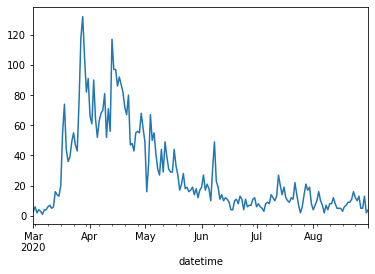

In [13]:
email_df.email_per_day.plot()

### Proportion de courriel par thème 

In [14]:
email_df.groupby_theme().sort_values(ascending=False)

reseaux_sociaux    55.659656
virus              44.015296
entourage          14.053537
regions            13.671128
politique          13.135755
reste_du_monde     12.619503
traitement         10.879541
complot            10.822180
chine               9.216061
europe              8.413002
bilan               8.011472
usa                 7.629063
experts             6.749522
masque              5.965583
laboratoire         2.715105
5g                  2.084130
qanon               0.688337
dtype: float64

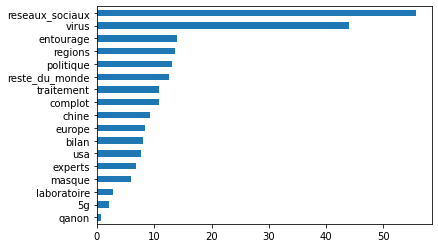

In [15]:
email_df.groupby_theme().sort_values().plot(kind='barh')

### Distribution dans le temps

In [16]:
def plot_theme_per_day(theme_per_day, theme, n_col=5, save=False):
    import matplotlib.pyplot as plt
    import numpy as np
    import math

    n_row = math.ceil(len(theme.keys()) / 5)  # nomber of row to show all plot with n_col
    fig, axs = plt.subplots(n_row, 5, figsize=(15, 10), facecolor='w', edgecolor='k', sharey=True)
    fig.subplots_adjust(hspace=1, wspace=.001)

    axs = axs.ravel()

    for i, theme in enumerate(theme.keys()):
        s = theme_per_day[theme]  # word and count value
        days = s.index
        values = s.values

        axs[i].plot(days, values)
        axs[i].set_title(theme)

        for tick in axs[i].get_xticklabels():
            tick.set_rotation(90)

    if save:
        plt.savefig('theme_per_day.png', dpi=300)

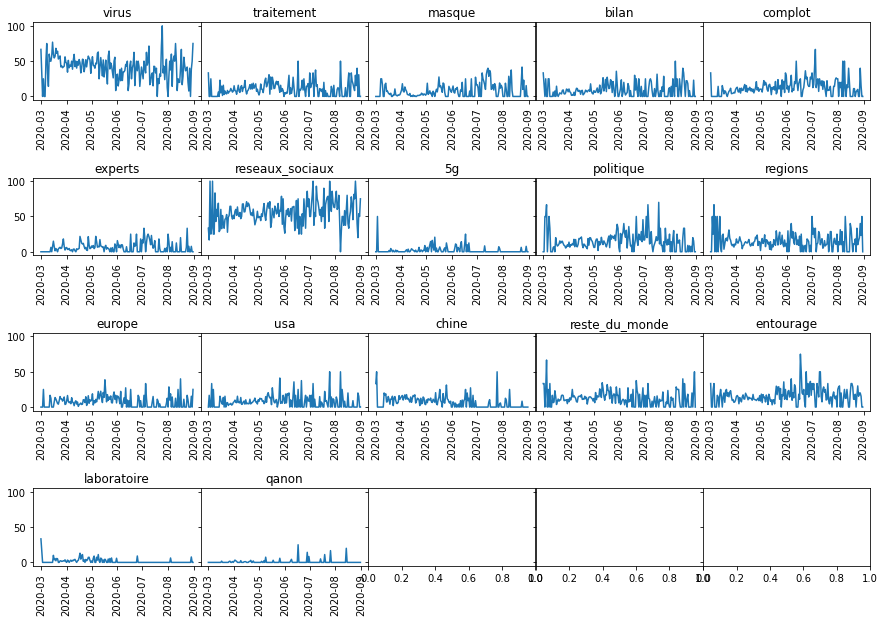

In [17]:
plot_theme_per_day(email_df.theme_per_day(), email_df.theme)

### Regardons maintenant chaque mots de chaque thématique 

In [18]:
email_df.groupby_word_in_theme()['qanon']

the storm          0
la tempête         0
wwg1wga            0
pédophilie         6
satanique          2
satanisme          0
deep state         2
état profond       1
pizzagate          2
adrenochrome       0
frazzledrip        0
comet ping pong    0
le réveil          0
great awakening    0
gitmo              0
guantanamo         0
declas             1
qanon              1
dtype: int64

In [19]:
def find_theme_by_word(dict_theme, word):
    for theme in dict_theme.keys():
        if word in dict_theme[theme]:
            return theme
def plot_email_with_words_per_day(dtm, dict_theme, with_words=[], n_col = 4, colormap='tab20', ymin=0, ymax=100):
    import math
    import numpy as np
    theme= dict_theme.keys()
    theme_id = {t:i for i,t in enumerate(theme)}
    colors = plt.cm.jet(plt.cm.tab20(np.linspace(0,1,len(theme))))
    if len(with_words) < 4:
        n_col = len(with_words)
#     n_row = math.ceil(len(with_words) / n_col) #nomber of row to show all plot with n_col
    fig, axs = plt.subplots(4, 4, figsize=(20, 10), facecolor='w', edgecolor='k', sharey=True)
    fig.subplots_adjust(hspace=1, wspace=.001)
    axs = axs.ravel()
    for iax, word in enumerate(with_words):
        try:
            theme = find_theme_by_word(dict_theme, word)
            pourc_em_per_day = dtm[word]
        except KeyError:
            print(f"pas trouver {word} dans tableau de proportion")
            continue
        axs[iax].plot(pourc_em_per_day.index, pourc_em_per_day.values, color='k', label=f'{theme}-{word}')
        axs[iax].legend(loc='best')
        axs[iax].set_ylim([ymin, ymax])
        
def get_words_from_freq(em_with_word_in_theme, lw_t=10, up_t=200):
    words = []
    for idx in em_with_word_in_theme.index:
        count = em_with_word_in_theme.loc[idx]
        if count>lw_t and count<up_t:
            words.append(idx[1])
    return words
        

problème avec le code ici pour afficher les graphiques du nombre de courriels avec un certain mot par jour.

In [20]:
# words = get_words_from_freq(email_df.groupby_word_in_theme())
# words[0:15]

# n_graph_per_fig= 16 - 1
# last_i=0
# ymin, ymax = 0,30
# for i in range(len(words)):
#     if len(words)-i < n_graph_per_fig and i%n_graph_per_fig ==0 and i!=0:
#         plot_email_with_words_per_day(dtm_day.proportion(email_df.email_per_day.values), dtm_day.theme, with_words=words[i:], n_col=4, ymin=ymin, ymax=ymax)

#     if i % n_graph_per_fig==0 and i!=0:
#         plot_email_with_words_per_day(dtm_day.proportion(email_df.email_per_day.values), dtm_day.theme, with_words=words[last_i:i], n_col=4, ymin=ymin, ymax=ymax)
#         last_i= i
#     plot_email_with_words_per_day(dtm_day.proportion(email_df.email_per_day.values), dtm_day.theme, with_words=words[:10], n_col=4)

### URLS populaires

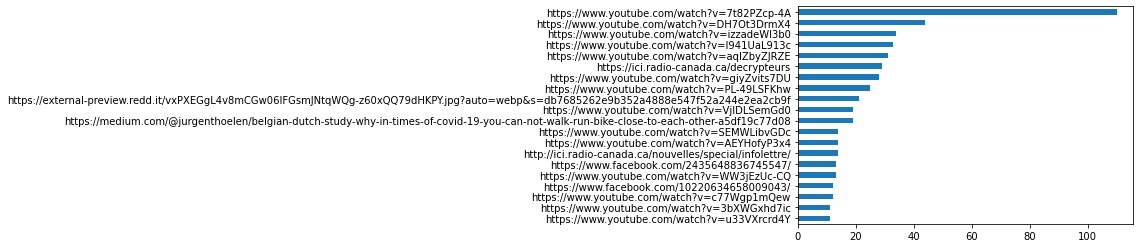

In [21]:
email_df.df.urls.explode().value_counts().drop('')[:20].sort_values(ascending=True).plot(kind='barh')

### URL de facebook

In [22]:
email_df.df.urls.explode()[email_df.df.domain.explode()=='facebook'].value_counts()[:25].sort_values(ascending=False)

https://www.facebook.com/2435648836745547/      13
https://www.facebook.com/10220634658009043/     12
https://www.facebook.com/10157174841211106/     10
https://www.facebook.com/groups/decrypteurs/     8
https://www.facebook.com/221750599238300/        7
https://www.facebook.com/10157174739631106/      7
https://www.facebook.com/4696237033735338/       6
https://www.facebook.com/10163425830315501/      6
https://www.facebook.com/1170890569958096/       6
https://www.facebook.com/1952307158131536/       5
https://www.facebook.com/669008923670898/        5
http://www.facebook.com                          5
https://www.facebook.com/110766340380387/        5
https://www.facebook.com/3046035462289522/       5
https://www.facebook.com/3004250292972420/       5
https://www.facebook.com/226913052006274/        5
https://www.facebook.com/3148558748511356/       5
http://www.facebook.com/MPbymarietteparent       4
https://www.facebook.com/10220634658209048/      4
https://www.facebook.com/101585

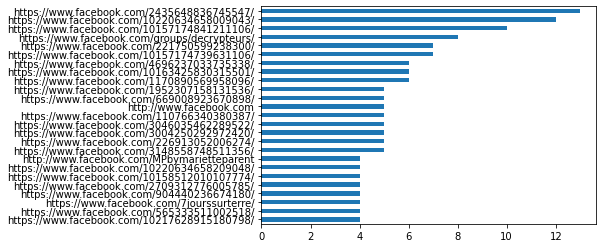

In [23]:
email_df.df.urls.explode()[email_df.df.domain.explode()=='facebook'].value_counts()[:25].sort_values(ascending=True).plot(kind='barh')

In [24]:
email_df.df.urls.explode()[email_df.df.domain.explode()=='facebook'].value_counts()[:25].sort_values(ascending=True).sum()

147

### URLS de youtube

In [25]:
email_df.df.urls.explode()[email_df.df.domain.explode()=='youtube'].value_counts()[:25].sort_values(ascending=False)

https://www.youtube.com/watch?v=7t82PZcp-4A    110
https://www.youtube.com/watch?v=DH7Ot3DrmX4     44
https://www.youtube.com/watch?v=izzadeWl3b0     34
https://www.youtube.com/watch?v=l941UaL913c     33
https://www.youtube.com/watch?v=aqIZbyZJRZE     31
https://www.youtube.com/watch?v=giyZvits7DU     28
https://www.youtube.com/watch?v=PL-49LSFKhw     25
https://www.youtube.com/watch?v=VjlDLSemGd0     19
https://www.youtube.com/watch?v=AEYHofyP3x4     14
https://www.youtube.com/watch?v=SEMWLibvGDc     14
https://www.youtube.com/watch?v=WW3jEzUc-CQ     13
https://www.youtube.com/watch?v=c77Wgp1mQew     12
https://www.youtube.com/watch?v=3bXWGxhd7ic     11
https://www.youtube.com/watch?v=u33VXrcrd4Y     11
https://www.youtube.com/watch?v=Z5kA6iBpYR4     10
https://www.youtube.com/watch?v=Fvp6uah-2hY     10
https://www.youtube.com/watch?v=m8HF4GXjsP8      9
https://www.youtube.com/watch?v=RDBhByCrMIY      9
https://www.youtube.com/watch?v=4eCQUoOUKhE      9
https://www.youtube.com/watch?v

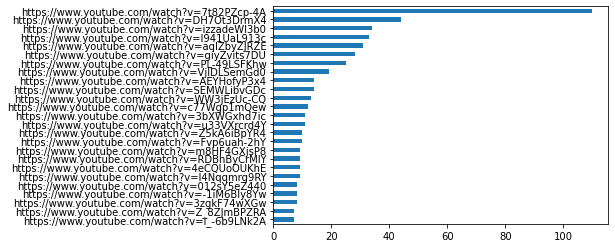

In [26]:
email_df.df.urls.explode()[email_df.df.domain.explode()=='youtube'].value_counts()[:25].sort_values(ascending=True).plot(kind='barh')

In [27]:
email_df.df.urls.explode()[email_df.df.domain.explode()=='youtube'].value_counts()[:25].sort_values(ascending=False).sum()

493

## conclusion d'une première analyse

On voit que certains thèmes sont plus important ou constant que d'autre:
 - Virus, Media sociaux
 
On voit que certains thèmes reviennent à un moment précis:
 - masques, 5g, chine, laboratoire
 
On voit que certains thèmes augmentent en importance:
 - entourage, complot, qanon
 
Certains domaines sont plus propices aux partages d'informations liés aux questions:
 - Facebook et Youtube
 
Bien que les urls de YouTube soit aussi nombreux que ceux de Facebook, ceux de Youtube sont plus populaire comme le montre le cumule du top 25 des plus mentionnés
 - FB (138) VS YT(486)

## MOTS UTILISÉS DANS LES COURRIELS

### Mots uniques

In [53]:
dtm_em_unique = dtm_em.unique

In [54]:
len(dtm_em_unique.columns)

40256

### nombre de courriels ayant utilisé au moins une fois le mot

In [56]:
dtm_em_unique.sum().sort_values(ascending=False)[:20]

facebook       1650
covid          1297
19             1165
vrai            978
vidéo           913
youtube         851
2020            835
coronavirus     805
travail         700
virus           691
voici           660
information     620
fbclid          601
youtu           581
faux            567
article         553
message         539
vérifier        521
beaucoup        516
lien            516
dtype: int64

### Distribution du nombre de mots uniques utilisés par courriel

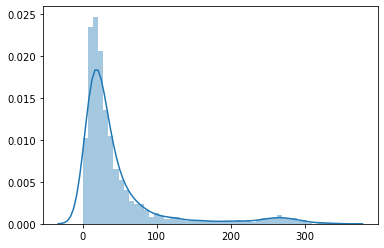

In [58]:
sns.distplot(dtm_em_unique.transpose().sum())

In [59]:
dtm_em_unique.transpose().sum().describe()

count    5230.000000
mean       46.845698
std        61.854403
min         0.000000
25%        14.000000
50%        25.000000
75%        48.000000
max       345.000000
dtype: float64